Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Airbnb, Inc. is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.The company is based in San Francisco, California, United States.

The company was conceived after its founders put an air mattress in their living room, effectively turning their apartment into a bed and breakfast, in order to offset the high cost of rent in San Francisco; Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

### Update Data and Library

## Library Used
 + tidyverse()
 + tm()            for text mining
 + SnowballC()     for text stemming
 + wordcloud()     word-cloud generator
 + RColorBrewer()  color palettes
 + scales()        using math functions
 + gridExtra()     using for plotting grid

In [1]:
#Useful Libraries
library(tidyverse)  
library(tm)          # for text mining
library(SnowballC)   # for text stemming
library(wordcloud)   # word-cloud generator
library(RColorBrewer)# color palettes
library(scales)      #using percentage function
library(gridExtra)   #using for plotting grid
library(Hmisc)
library(corrplot)
#Load File
list.files(path = "../input")
df <- read.csv("../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv", encoding="UTF-8", stringsAsFactors = F, na.strings = c(""))

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.2     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content


Loading required package: RColorBrewer


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: lattice

Loading required package: surv

[1] "new-york-city-airbnb-open-data"

In [2]:
head(df)
str(df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NA,NA,1,365
4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


'data.frame':	48895 obs. of  16 variables:
 $ id                            : int  2539 2595 3647 3831 5022 5099 5121 5178 5203 5238 ...
 $ name                          : chr  "Clean & quiet apt home by the park" "Skylit Midtown Castle" "THE VILLAGE OF HARLEM....NEW YORK !" "Cozy Entire Floor of Brownstone" ...
 $ host_id                       : int  2787 2845 4632 4869 7192 7322 7356 8967 7490 7549 ...
 $ host_name                     : chr  "John" "Jennifer" "Elisabeth" "LisaRoxanne" ...
 $ neighbourhood_group           : chr  "Brooklyn" "Manhattan" "Manhattan" "Brooklyn" ...
 $ neighbourhood                 : chr  "Kensington" "Midtown" "Harlem" "Clinton Hill" ...
 $ latitude                      : num  40.6 40.8 40.8 40.7 40.8 ...
 $ longitude                     : num  -74 -74 -73.9 -74 -73.9 ...
 $ room_type                     : chr  "Private room" "Entire home/apt" "Private room" "Entire home/apt" ...
 $ price                         : int  149 225 150 89 80 200 60 79 79 150 .

* 48895 obs. of  16 variables are present

In [3]:
sum(is.na(df))
length(unique(df$id)) == nrow(df)

[1] 20141

[1] TRUE

* Showing that 20141 "NA"s are there.
* No duplicate entries are present.

In [4]:
summary(df)

       id               name              host_id           host_name        
 Min.   :    2539   Length:48895       Min.   :     2438   Length:48895      
 1st Qu.: 9471945   Class :character   1st Qu.:  7822033   Class :character  
 Median :19677284   Mode  :character   Median : 30793816   Mode  :character  
 Mean   :19017143                      Mean   : 67620011                     
 3rd Qu.:29152178                      3rd Qu.:107434423                     
 Max.   :36487245                      Max.   :274321313                     
                                                                             
 neighbourhood_group neighbourhood         latitude       longitude     
 Length:48895        Length:48895       Min.   :40.50   Min.   :-74.24  
 Class :character    Class :character   1st Qu.:40.69   1st Qu.:-73.98  
 Mode  :character    Mode  :character   Median :40.72   Median :-73.96  
                                        Mean   :40.73   Mean   :-73.95  
           

In [5]:
describe(df)

df 

 16  Variables      48895  Observations
--------------------------------------------------------------------------------
id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   48895        0    48895        1 19017143 12670422  1222383  3496066 
     .25      .50      .75      .90      .95 
 9471945 19677284 29152178 33990940 35259101 

lowest :     2539     2595     3647     3831     5022
highest: 36484665 36485057 36485431 36485609 36487245
--------------------------------------------------------------------------------
name 
       n  missing distinct 
   48879       16    47905 

lowest :  1 Bed Apt in Utopic Williamsburg             2-3 bedroom UWS garden triplex               3 bedroom loft in Williamsburg               A charming Space in Brooklyn                 Affordable & Cozy                          
highest: 靠近机场交通方便双人房#3                     靠近机场交通方便明亮大房间#3                 靠近机场交通购物两便利房间#1                 音樂之家 Musician and Artist Exhibition Ho

* Missing values are also there.

## Variable: df$id

In [6]:
df$id <- NULL
#As per the model building criteria drop id column does not effect.

## Variable: df$name

In [7]:
df$name <- as.character(tolower(df$name))
length(df$name[df$name ==""])

[1] 16

* 16 names are missing.

In [8]:
df1 <- df %>% arrange(desc(price))

wc <- Corpus(VectorSource(df1$name))
wc <- tm_map(wc,content_transformer(tolower))
wc <- tm_map(wc,removeWords,stopwords("english"))
wc <- tm_map(wc,removePunctuation)
wc <- tm_map(wc,stripWhitespace)
#inspect(wc)

Warning message in tm_map.SimpleCorpus(wc, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(wc, removeWords, stopwords("english")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(wc, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(wc, stripWhitespace):
“transformation drops documents”


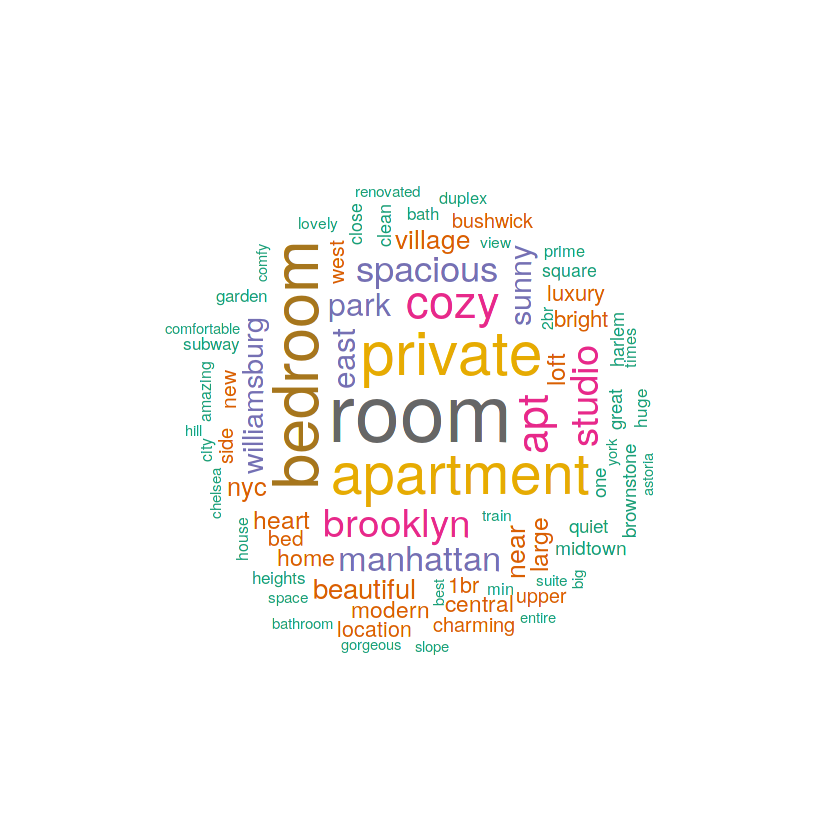

In [9]:
d <- TermDocumentMatrix(wc)
d <- as.matrix(d)
d <- sort(rowSums(d),decreasing = TRUE)
d <- data.frame(word = names(d),freq =d)

wordcloud(d$word,d$freq,max.words = 75,random.order = FALSE,rot.per=0.35,use.r.layout = F,
          colors = brewer.pal(8, 'Dark2'))

'data.frame':	11241 obs. of  3 variables:
 $ catchy_words: Factor w/ 11241 levels "️","–","–airport",..: 8419 2579 7968 1915 3867 1992 3011 9394 9073 6588 ...
 $ freq        : num  10042 7604 7160 6696 4991 ...
 $ perc        : num  4.4 3.33 3.14 2.94 2.19 ...


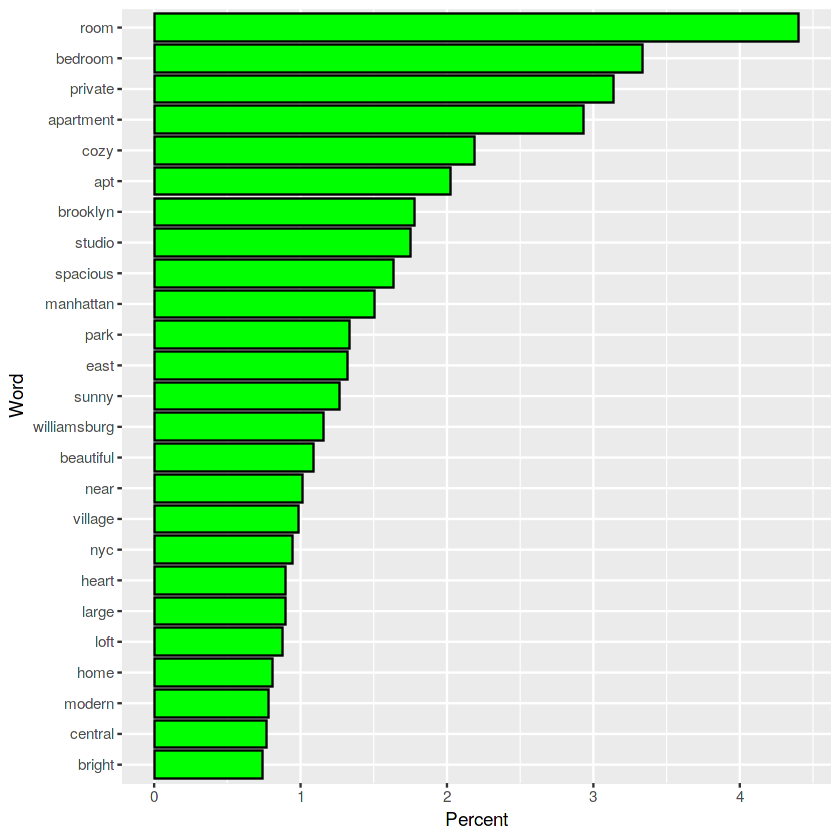

In [10]:
rownames(d) <- 1:nrow(d)
d$perc <- (d$freq/sum(d$freq))*100

names(d)[names(d) == 'word'] <- 'catchy_words'

str(d)

d %>%
   head(25) %>%
   ggplot(aes(x=reorder(catchy_words,perc), y=perc)) +
   geom_bar(stat='identity',fill = 'green', colour = 'black') +
   coord_flip()+
   labs(x = 'Word', y = 'Percent')

df1 <- NULL
df$name <- NULL
rm(d)
rm(wc)
rm(df1)

* By using wordcloud scenario we found that "room" word is used many times in property description
* As per my backend analysis name variable contains less potential to describe the top_100 listing. After knowing all facts from  analysis it's better to drop this column.

## Variable: df$host_name_id
* Create a new variable which clearly explain host name and id

In [11]:
df$host_name_id <- paste(df$host_name,df$host_id,sep="--")
df <- df[c(-(1:2))]

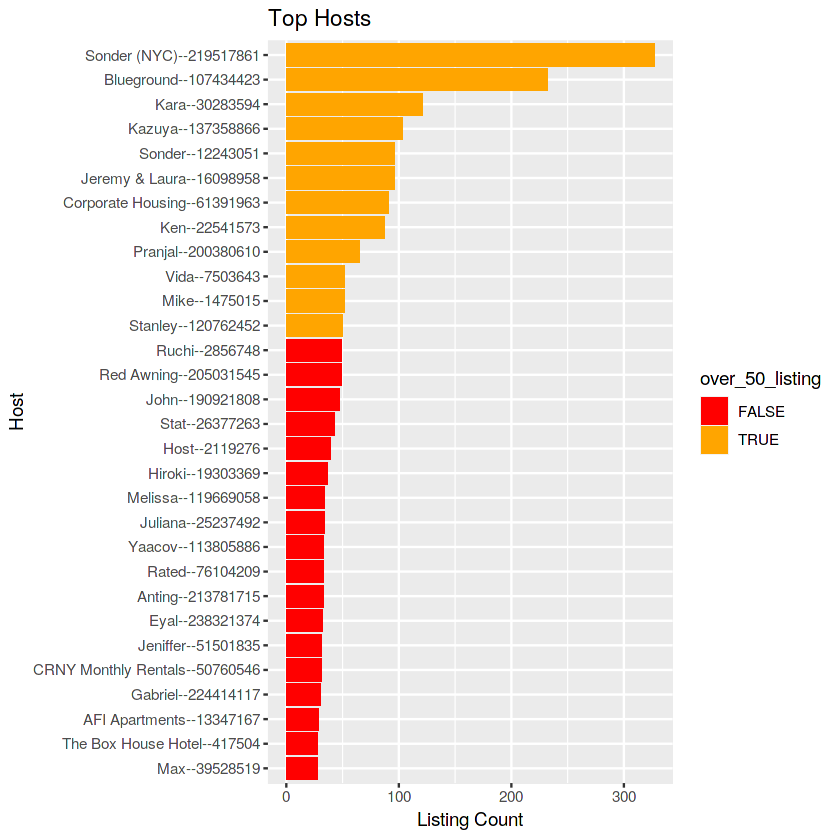

In [12]:
top <- data.frame(head(sort(table(df$host_name_id), decreasing=TRUE),n=100)) 
colnames(top) <- c("host","listing_count")
top %>%
   head(30) %>%
   mutate(over_50_listing = ifelse(listing_count >= 50, T, F)) %>% 
   ggplot(aes(x=reorder(host, listing_count),y = listing_count),)+
   geom_bar(aes(fill=over_50_listing),stat='identity') +
   scale_fill_manual(values = c('red', 'orange'))+
   coord_flip()+
   labs(x = 'Host', y = 'Listing Count',title = 'Top Hosts')

* Host identified as Sonder(NYC) who has highest number of listing i.e. 327 as per the data given. 
* These data can be observed from "calculated_host_listings_count" variable.
* Here you can see the busiest hosts, because they are dealing with maximum properties.

## Variable: df$neighbourhood_group

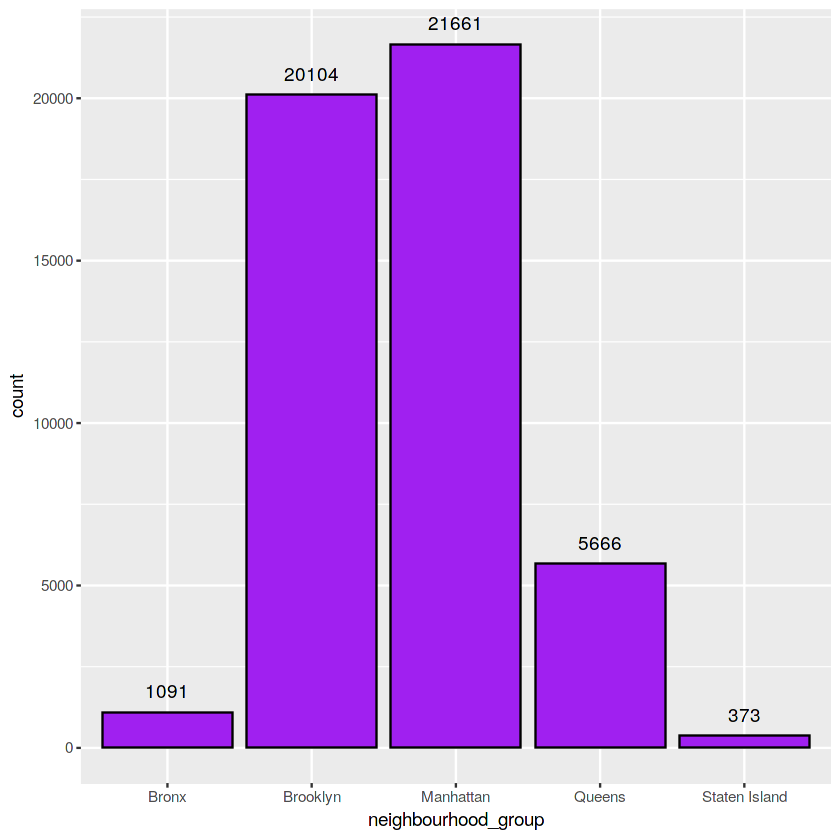

In [13]:
df %>%  
  ggplot(aes(neighbourhood_group)) + 
  geom_bar(fill = 'purple', colour = 'black')+
  geom_text(aes(label=..count..),stat='count',vjust=-1)

* Most of the properties are registered in Manhattan i.e. 21,661 followed by Brooklyn i.e. 20,104

## Variable: df$neighbourhood

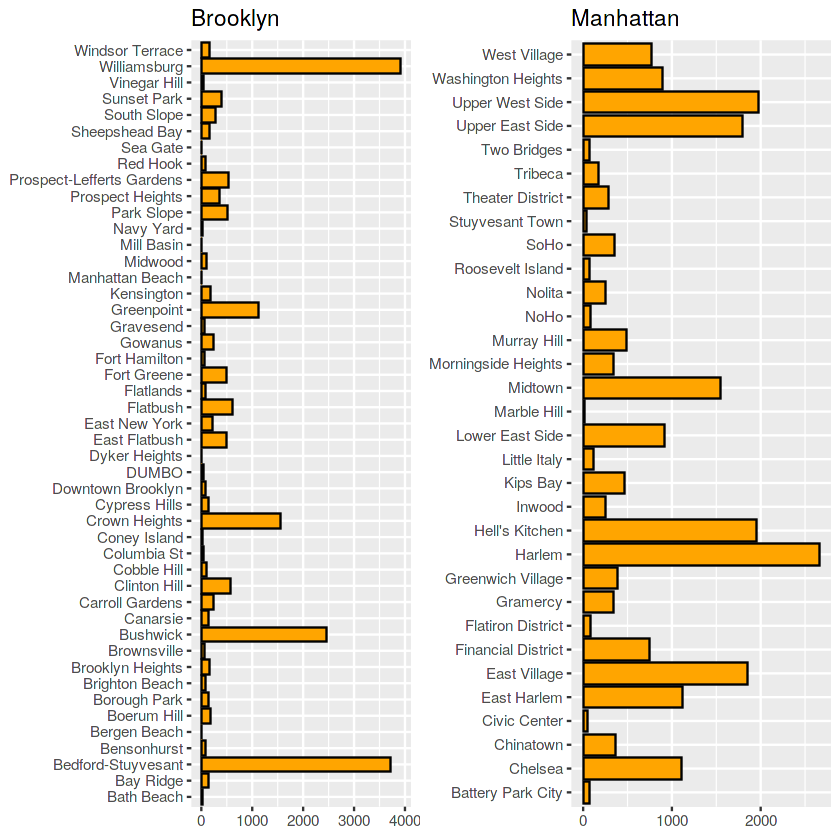

In [14]:
list_plot <- NULL

for (i in 1:length(unique(df$neighbourhood_group))) {
  list_plot[[i]] <- df %>% 
    filter(neighbourhood_group == unique(neighbourhood_group)[i]) %>% 
    ggplot(aes(neighbourhood)) + 
    geom_bar(fill = 'orange', colour = 'black') + 
    labs(x = 'Neighbourhood', title = unique(df$neighbourhood_group)[i]) + 
    coord_flip() + 
    theme(axis.title.x = element_blank(), axis.title.y = element_blank())
}

grid.arrange(list_plot[[1]], list_plot[[2]], nrow = 1)

* At Brooklyn and Manhattan it's good to see many region touch up to 1000 of listing.

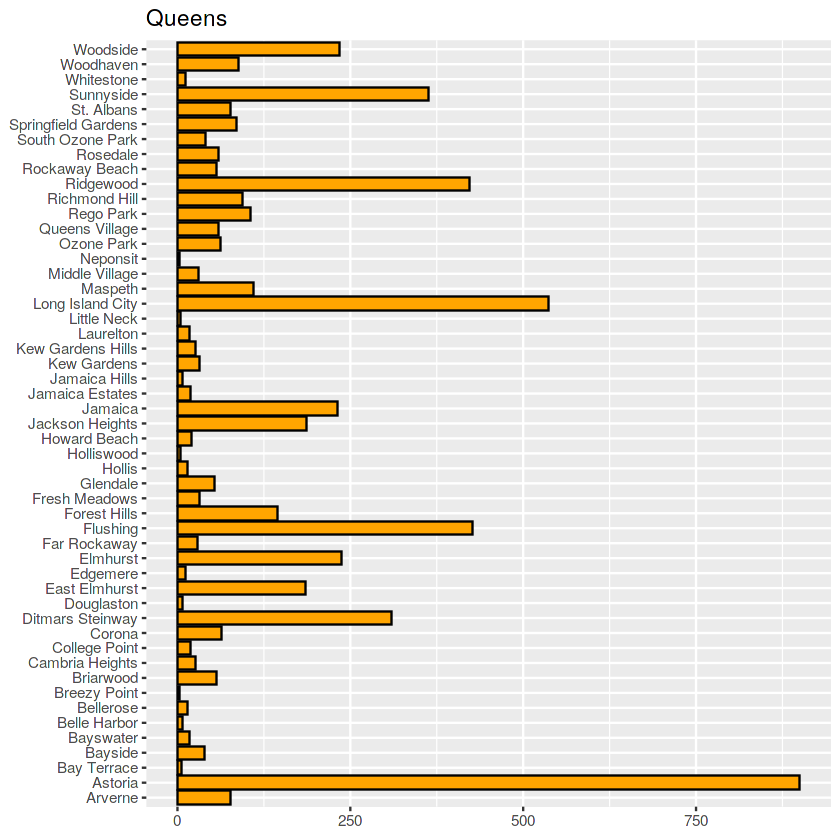

In [15]:
list_plot[[3]]

* At Queens it's an average listing not touched 1000 compared to all others.

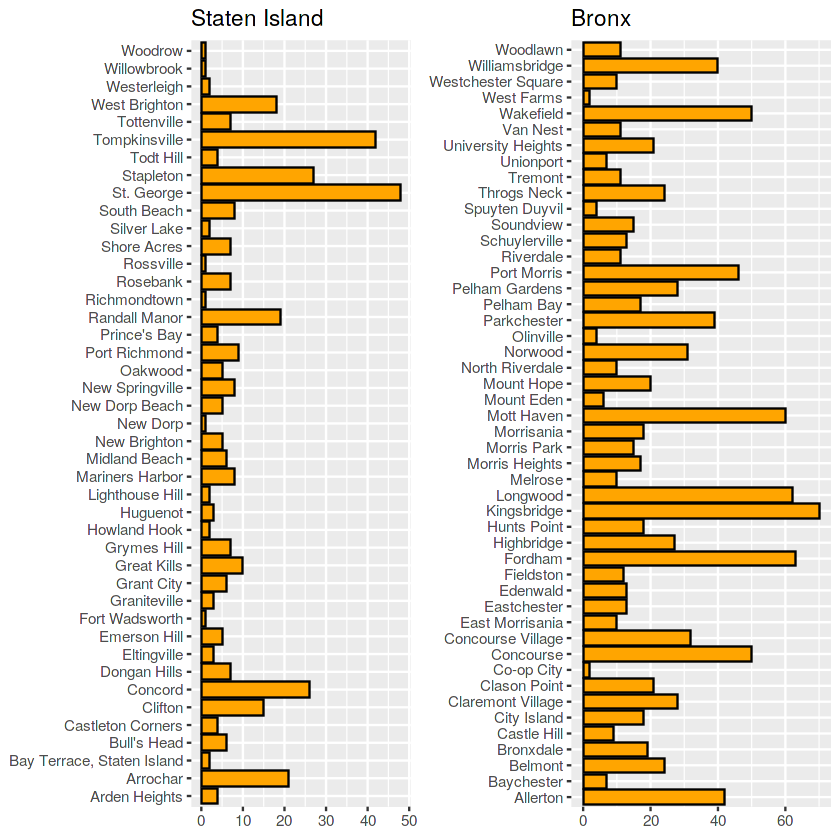

In [16]:
grid.arrange(list_plot[[4]], list_plot[[5]], nrow = 1)

* At Staten Island and Bronx it's hard to see any region touch up to 100 of listing.

In [17]:
for (i in 1:length(unique(df$neighbourhood_group)))
{
print(unique(df$neighbourhood_group)[i])
print(length(unique(df$neighbourhood[which(df$neighbourhood_group == unique(df$neighbourhood_group)[i])])))
}

df$neighbourhood <- NULL

[1] "Brooklyn"
[1] 47
[1] "Manhattan"
[1] 32
[1] "Queens"
[1] 51
[1] "Staten Island"
[1] 43
[1] "Bronx"
[1] 48


* Although Manhattan having spread over less locality then others but heighest business opportunities are there.
* Neighbourhood data points are not worthy for future analysis as data point of view. We can consider neighbourhood_group instead of if.

## Variable: df$room_type

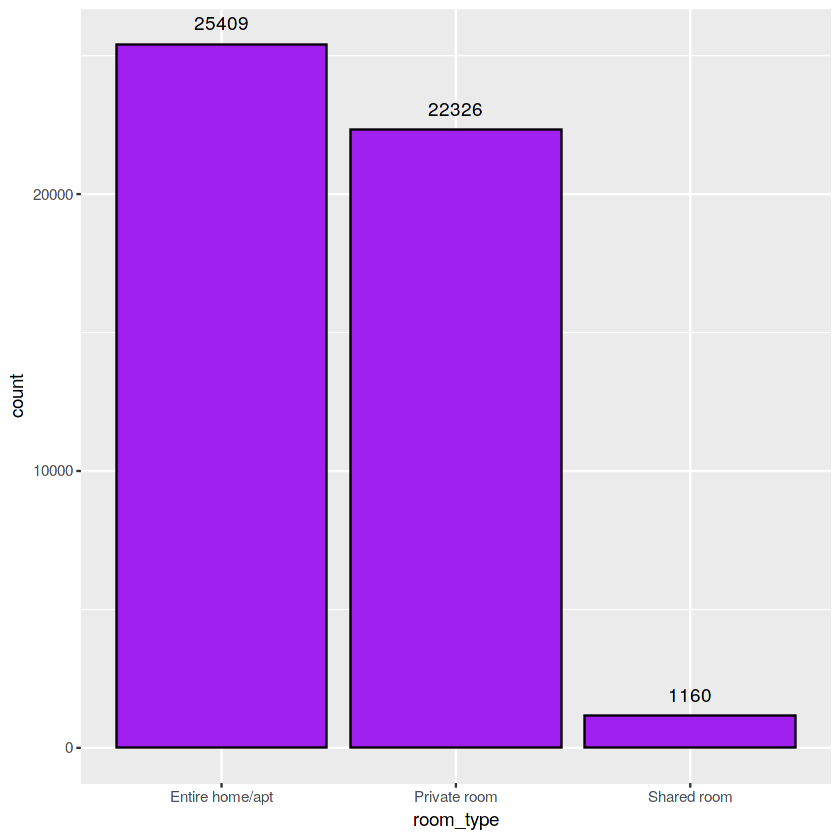

In [18]:
df %>%  
  ggplot(aes(room_type)) + 
  geom_bar(fill = 'purple', colour = 'black')+
  geom_text(aes(label=..count..),stat='count',vjust=-1)

* Shared room properties are less demanding rather then Entire home/apt followed by private room

## Variable: df$price

In [19]:
length(df$price[df$price==0])
print(length(df$price[df$price>0 & df$price<114]))
print(length(df$price[df$price>114 & df$price<10000]))

[1] 11

[1] 25581
[1] 23272


* The given price are inclined towards price range near around 100 dollar.
* You can see between price data of 0 dollar to 114 dollar, 25581 observations collected.
* And for remaining range (114 dollar to 10000 dollar), 23272 observation collected.
* From the price point of view data is disturbed lets use log function to reduce randomness and use it.

Warning message:
“Removed 11 rows containing non-finite values (stat_bin).”


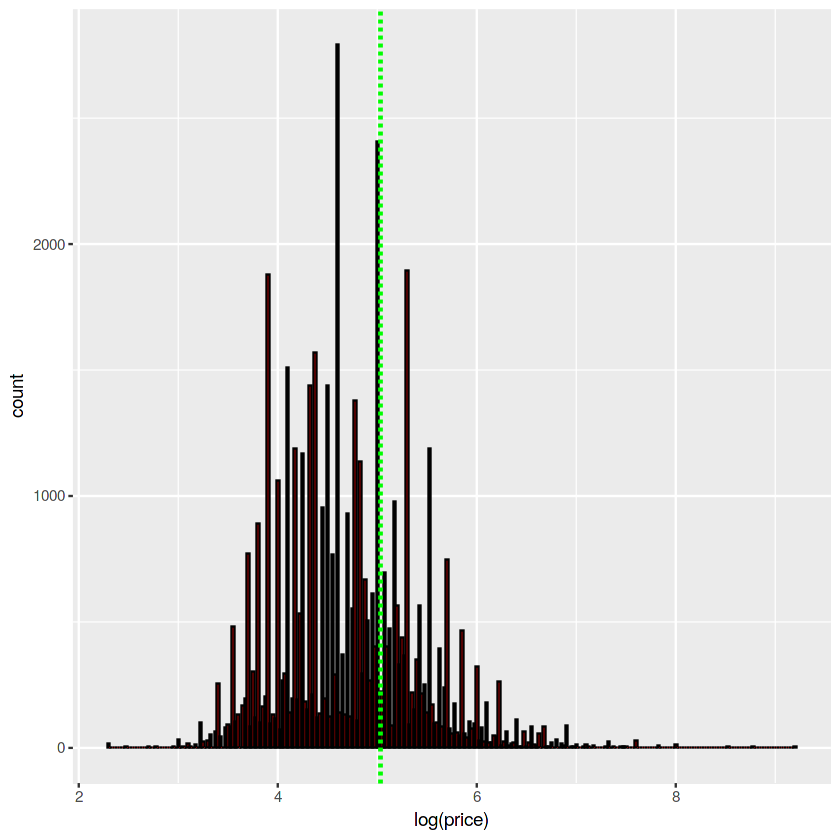

In [20]:
df %>% 
   ggplot(aes(log(price))) + 
   geom_histogram(binwidth=0.025,fill = 'red',col="black")+
   geom_vline(xintercept = log(mean(df$price)), linetype = 'dashed', colour = 'green', size = 1)

* Now the price variable is looks like normally distributed.
* In future log function is used for modelling.

## Variable: df$minimum_nights

 int [1:48895] 1 1 3 1 10 3 45 2 2 1 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.00    3.00    7.03    5.00 1250.00 

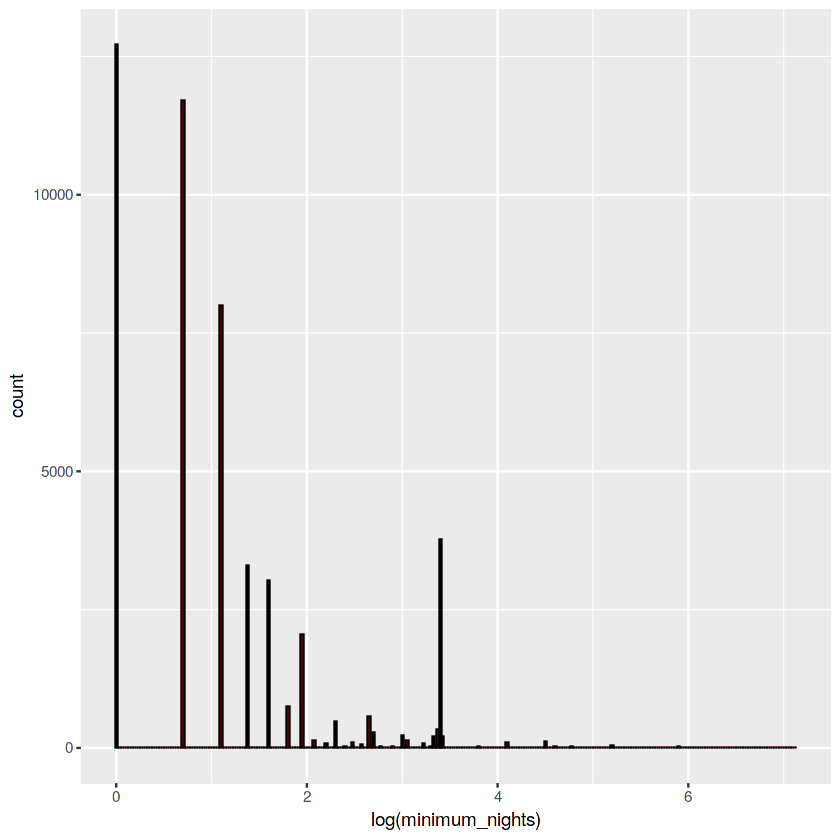

In [21]:
str(df$minimum_nights)
summary(df$minimum_nights)

df%>%
   ggplot(aes(log(minimum_nights)))+
   geom_histogram(binwidth=0.025, fill ='red',col ='black')

* There is a huge difference between minimum night spends. As per my secondary research incomparable minimum nights are derived from   lease agreements done by tentant and owner.

## Variable: df$number_of_reviews

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    1.00    5.00   23.27   24.00  629.00 

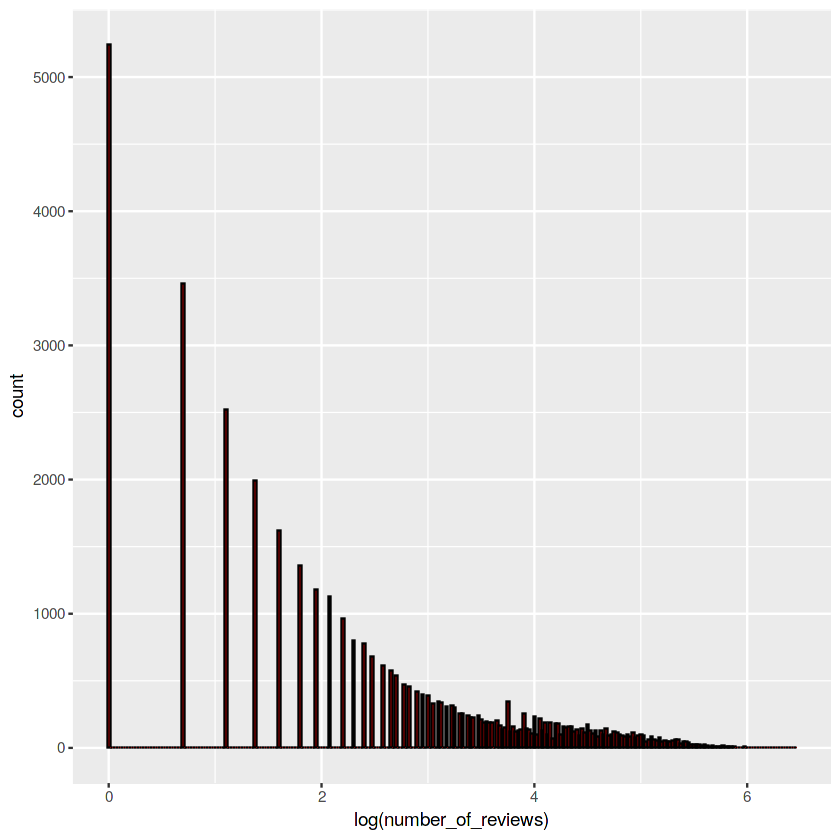

In [22]:
df[!(df$number_of_reviews==0),]%>%
   ggplot(aes(log(number_of_reviews)))+
   geom_histogram(binwidth=0.025, fill ='red',col ='black')

summary(df$number_of_reviews)

## Variable: df$last_review

In [23]:
length(df$last_review[df$last_review==""])
df_tr <- df
df$last_review<-NULL

[1] 10052

## Variable: df$reviews_per_month

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.040   0.370   1.091   1.580  58.500 

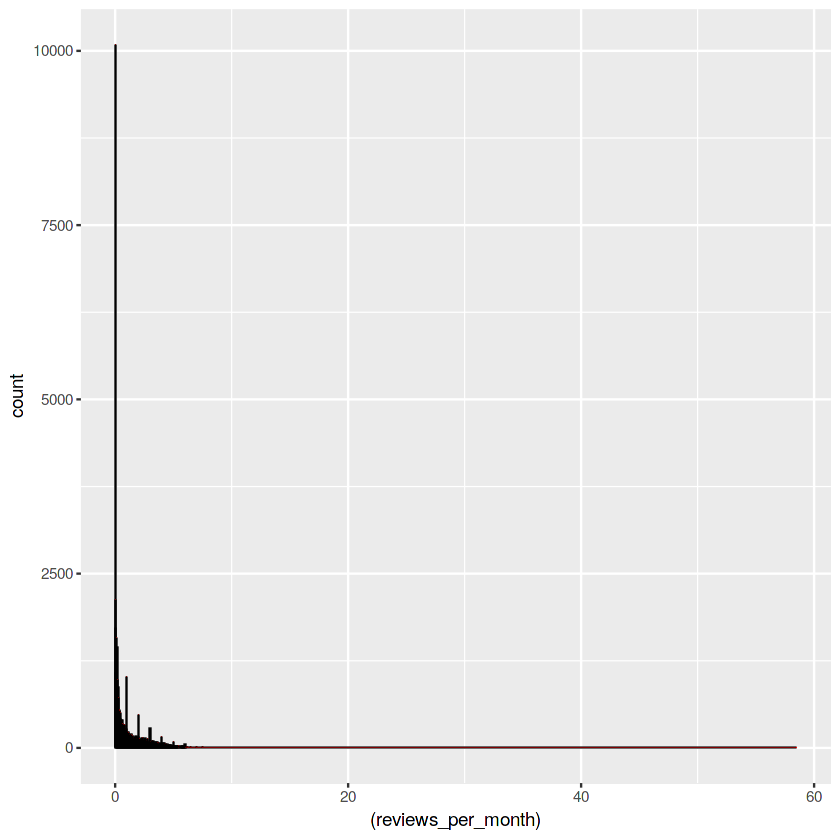

In [24]:
df$reviews_per_month[is.na(df$reviews_per_month)] <- 0
summary(df$reviews_per_month)
df%>%
   ggplot(aes((reviews_per_month)))+
   geom_histogram(binwidth=0.025, fill ='red',col ='black')

## Variable: df$calculated_host_listings_count

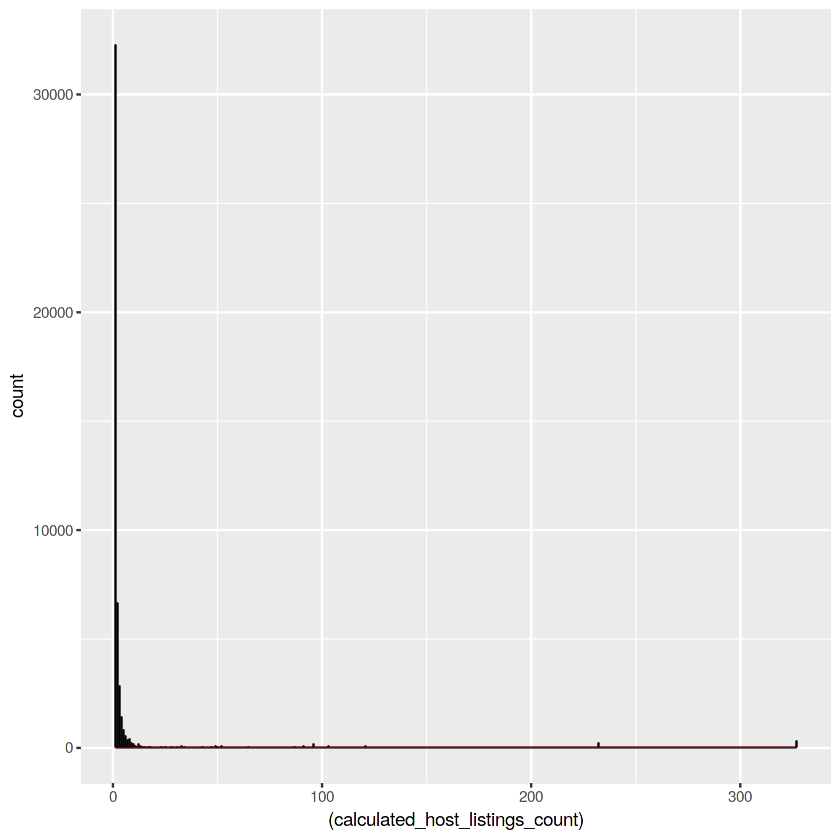

In [25]:
df%>%
   ggplot(aes((calculated_host_listings_count)))+
   geom_histogram(binwidth=0.025, fill ='red',col ='black')

* It's a continious value which is actual number of host listings - another metric to measure host experience or to distinguish buisness from individual. It is also analysed earlier.

## Variable: df$availability_365

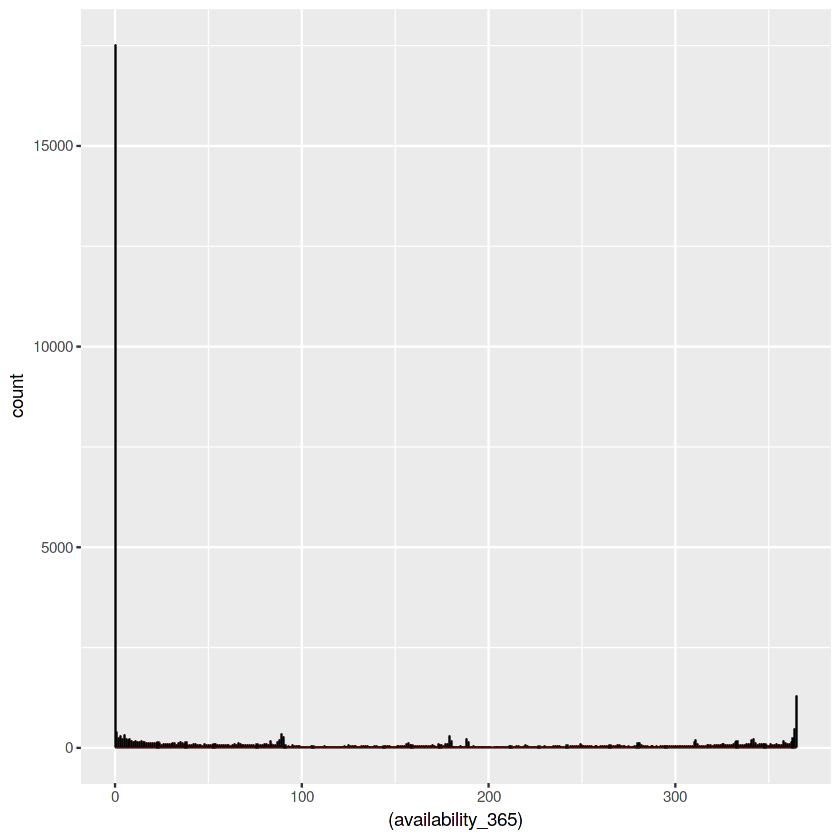

In [26]:
df%>%
   ggplot(aes((availability_365)))+
   geom_histogram(binwidth=0.025, fill ='red',col ='black')

* Maximum properties are available for 0 days. May be these properties are listed out or closed for renovation.

## Bivariate Analysis
* Selecting all Numeric Variables

In [27]:
df_Numeric_Variable <- select_if(df, is.numeric)
names(df_Numeric_Variable)

[1] "latitude"                       "longitude"                     
[3] "price"                          "minimum_nights"                
[5] "number_of_reviews"              "reviews_per_month"             
[7] "calculated_host_listings_count" "availability_365"

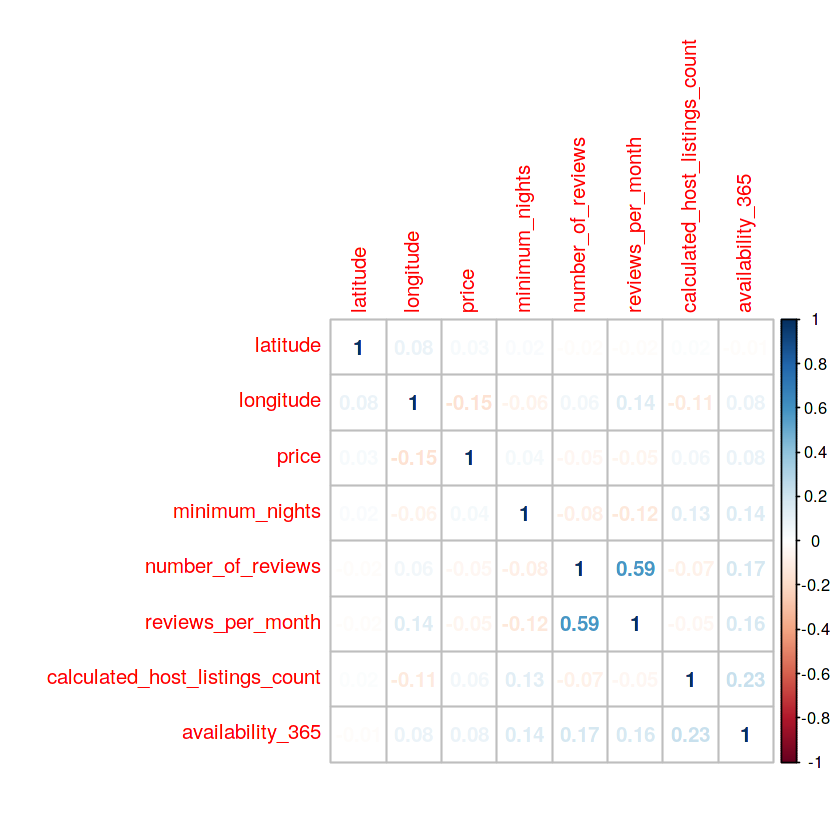

In [28]:
corr <- cor(df_Numeric_Variable)
corrplot(corr, method="number")

* number_of_reviews and reviews_per_month are moderately represent each other.
* review_period = (number_of_reviews)/reviews_per_month

In [29]:
df$review_period = round(df$number_of_reviews/df$reviews_per_month)
df$review_period[which(df$review_period == "NaN")] <- 0
#df$number_of_reviews <- NULL
#df$reviews_per_month <- NULL

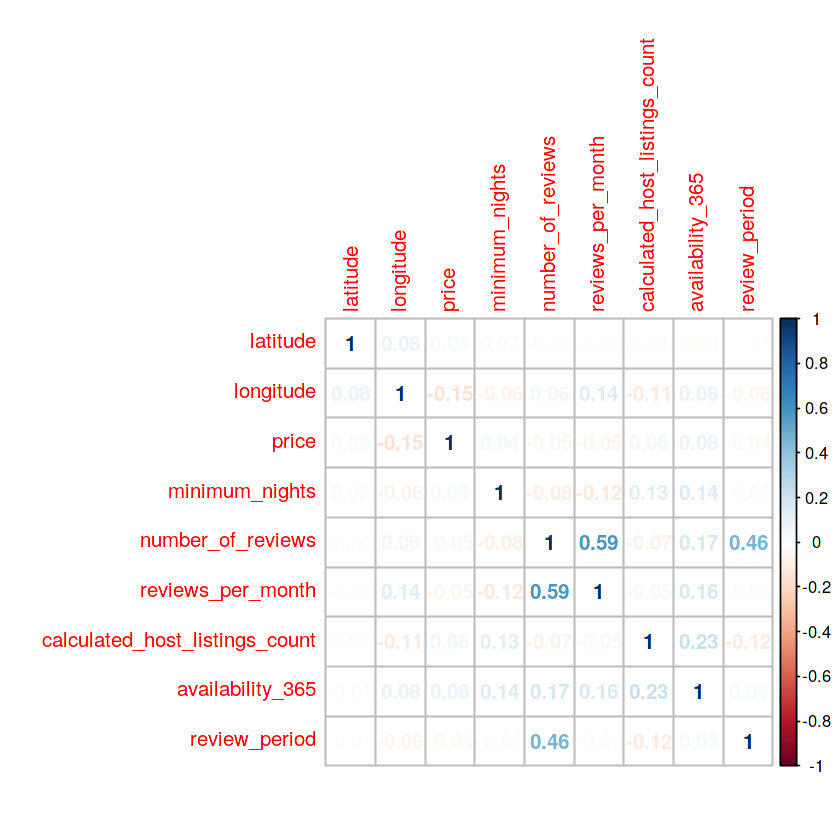

In [30]:
df_Numeric_Variable <- select_if(df, is.numeric)
corr <- cor(df_Numeric_Variable)
corrplot(corr, method="number")

## Host and Area

In [31]:
for (i in 1:length(unique(df$neighbourhood_group)))
{
print(unique(df$neighbourhood_group)[i])
print(length(unique(df$host_name_id[which(df$neighbourhood_group == unique(df$neighbourhood_group)[i])])))
}

[1] "Brooklyn"
[1] 15966
[1] "Manhattan"
[1] 16578
[1] "Queens"
[1] 3983
[1] "Staten Island"
[1] 256
[1] "Bronx"
[1] 789


* Maximum hosts are listed from Manhattan followed by Brooklyn. It's obivious because of more properties are listed under Manhattan and Brooklyn respectively as compared to other states.

## Understand Airbnb business as per the neighbourhoods
* Latitute
* Longitude
* Relation with others variables

In [32]:
df$neighbourhood_group <- as.factor(df$neighbourhood_group)
names(df)
str(df)

[1] "neighbourhood_group"            "latitude"                      
 [3] "longitude"                      "room_type"                     
 [5] "price"                          "minimum_nights"                
 [7] "number_of_reviews"              "reviews_per_month"             
 [9] "calculated_host_listings_count" "availability_365"              
[11] "host_name_id"                   "review_period"

'data.frame':	48895 obs. of  12 variables:
 $ neighbourhood_group           : Factor w/ 5 levels "Bronx","Brooklyn",..: 2 3 3 2 3 3 2 3 3 3 ...
 $ latitude                      : num  40.6 40.8 40.8 40.7 40.8 ...
 $ longitude                     : num  -74 -74 -73.9 -74 -73.9 ...
 $ room_type                     : chr  "Private room" "Entire home/apt" "Private room" "Entire home/apt" ...
 $ price                         : int  149 225 150 89 80 200 60 79 79 150 ...
 $ minimum_nights                : int  1 1 3 1 10 3 45 2 2 1 ...
 $ number_of_reviews             : int  9 45 0 270 9 74 49 430 118 160 ...
 $ reviews_per_month             : num  0.21 0.38 0 4.64 0.1 0.59 0.4 3.47 0.99 1.33 ...
 $ calculated_host_listings_count: int  6 2 1 1 1 1 1 1 1 4 ...
 $ availability_365              : int  365 355 365 194 0 129 0 220 0 188 ...
 $ host_name_id                  : chr  "John--2787" "Jennifer--2845" "Elisabeth--4632" "LisaRoxanne--4869" ...
 $ review_period                 : num  43 118

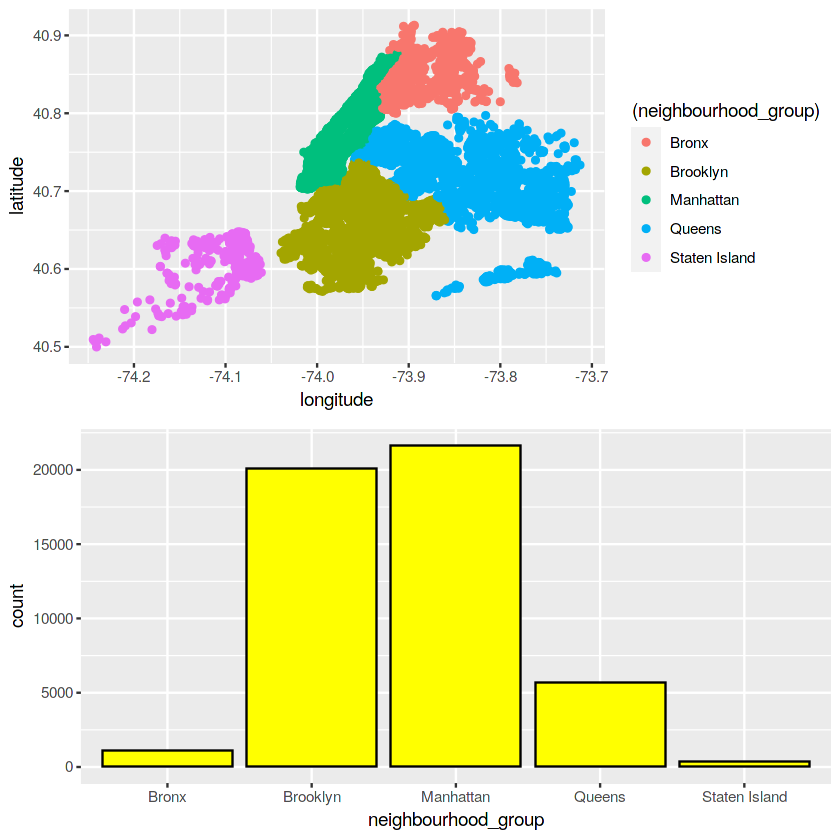

In [33]:
 list_plot[[1]] <- ggplot(data=df, aes(x=longitude, y=latitude))+
   geom_point(aes(colour = (neighbourhood_group)))


list_plot[[2]]<-df %>%
  ggplot(aes(neighbourhood_group)) + 
  geom_bar(fill = 'yellow', colour = 'black')

grid.arrange(list_plot[[1]], list_plot[[2]], nrow = 2)

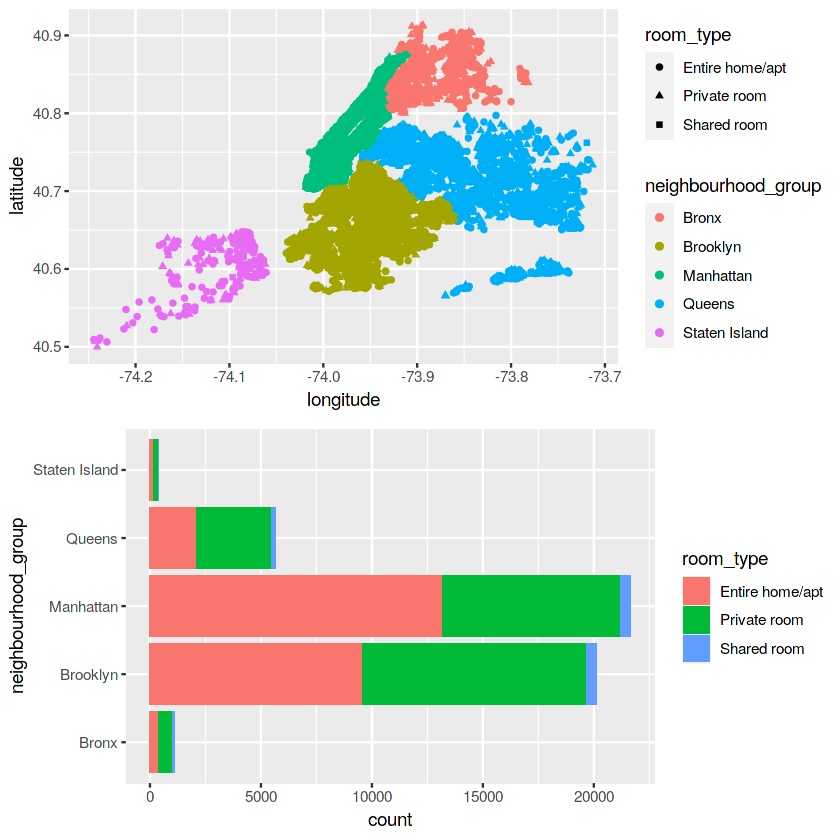

In [34]:
list_plot[[1]] <- ggplot(data=df, aes(x=longitude, y=latitude))+
   geom_point(aes(colour = neighbourhood_group,shape = room_type))

list_plot[[2]] <- ggplot(data =df,aes(neighbourhood_group))+
   geom_bar(aes(fill=room_type),position = position_stack(reverse = TRUE))+
   coord_flip()

grid.arrange(list_plot[[1]], list_plot[[2]], nrow = 2)

Warning message:
“Removed 1763 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 47327 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 47463 rows containing missing values (geom_point).”


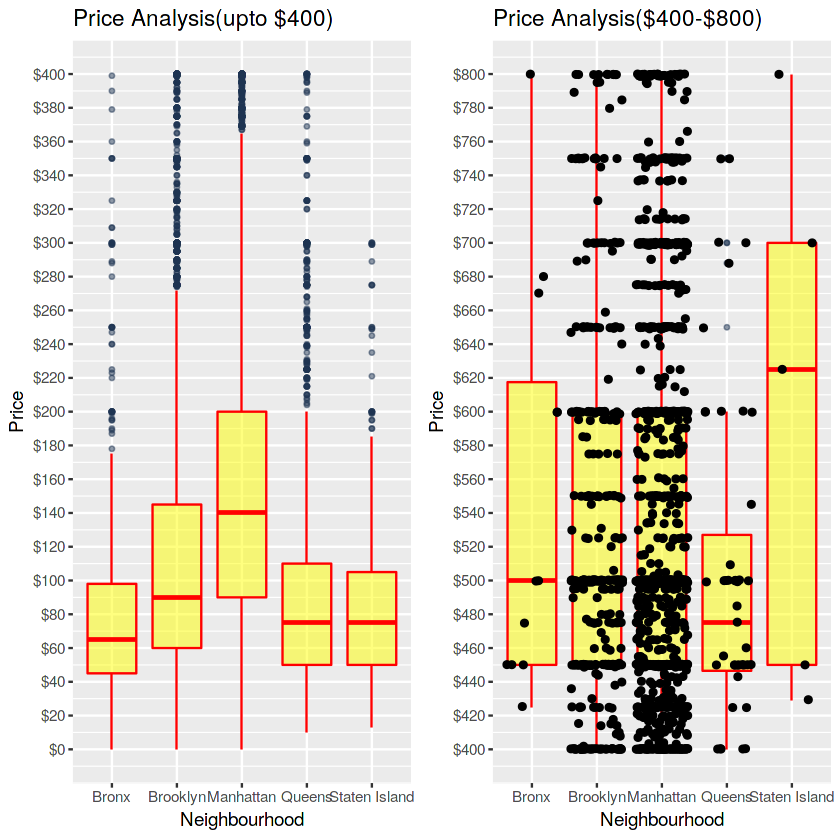

In [35]:
list_plot <- NULL

list_plot[[1]] <- df%>%
      ggplot(aes(x = neighbourhood_group, y = (price))) +
      geom_boxplot(fill = "yellow",colour = "red",alpha = 0.5,outlier.colour = "#1F3552", outlier.shape = 20)+
      scale_x_discrete(name = "Neighbourhood") +
      scale_y_continuous(name = "Price",breaks = seq(0,400,20),limits=c(0,400),labels=function(x) paste0("$",x))+
      ggtitle("Price Analysis(upto $400)")


list_plot[[2]] <- df%>%
      ggplot(aes(x = neighbourhood_group, y = (price))) +
      geom_boxplot(fill = "yellow",colour = "red",alpha = 0.5,outlier.colour = "#1F3552", outlier.shape = 20)+
      scale_x_discrete(name = "Neighbourhood") +
      scale_y_continuous(name = "Price",breaks = seq(400,800,20),limits=c(400,800),labels=function(x) paste0("$",x))+
      ggtitle("Price Analysis($400-$800)")+
                         geom_jitter()

list_plot[[3]] <- df%>%
      ggplot(aes(x = neighbourhood_group, y = (price))) +
      geom_boxplot(fill = "yellow",colour = "red",alpha = 0.5,outlier.colour = "#1F3552", outlier.shape = 20)+
      scale_x_discrete(name = "Neighbourhood") +
      scale_y_continuous(name = "Price",breaks = seq(800,1200,20),limits=c(800,1200),labels=function(x) paste0("$",x))+
      ggtitle("Price Analysis($800-$1200)")+
      geom_jitter()

list_plot[[4]] <- df%>%
      ggplot(aes(x = neighbourhood_group, y = (price))) +
      geom_boxplot(fill = "yellow",colour = "red",alpha = 0.5,outlier.colour = "#1F3552", outlier.shape = 20)+
      scale_x_discrete(name = "Neighbourhood") +
      scale_y_continuous(name = "Price",breaks = seq(1200,10000,500),limits=c(1200,10000),labels=function(x) paste0("$",x))+
      ggtitle("Price Analysis($1200-$10000)")+
      geom_jitter()

grid.arrange(list_plot[[1]], list_plot[[2]], nrow = 1)

#### 0 to 400
* In between of dollar range 0 to 400 average price distribution differs from each other. Rather then that relatively high pricing difference among Brooklyn, Manhattan and rest of three.
* Bronx, Queens and Staten Island play a nearer average price game in 0 to 400 league.
 
#### 400 to 800
* Average price of properties around Staten Isaland is costlier then rest of others.
* In this case Bronx, Brooklyn and Manhattan average price near about 500 for each respectively.
* Queens has lower cost rental properties. But there are many properties present in Queen as compared to Bronx and Staten Island.

Warning message:
“Removed 48613 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 48655 rows containing missing values (geom_point).”
Warning message:
“Removed 48688 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 48693 rows containing missing values (geom_point).”


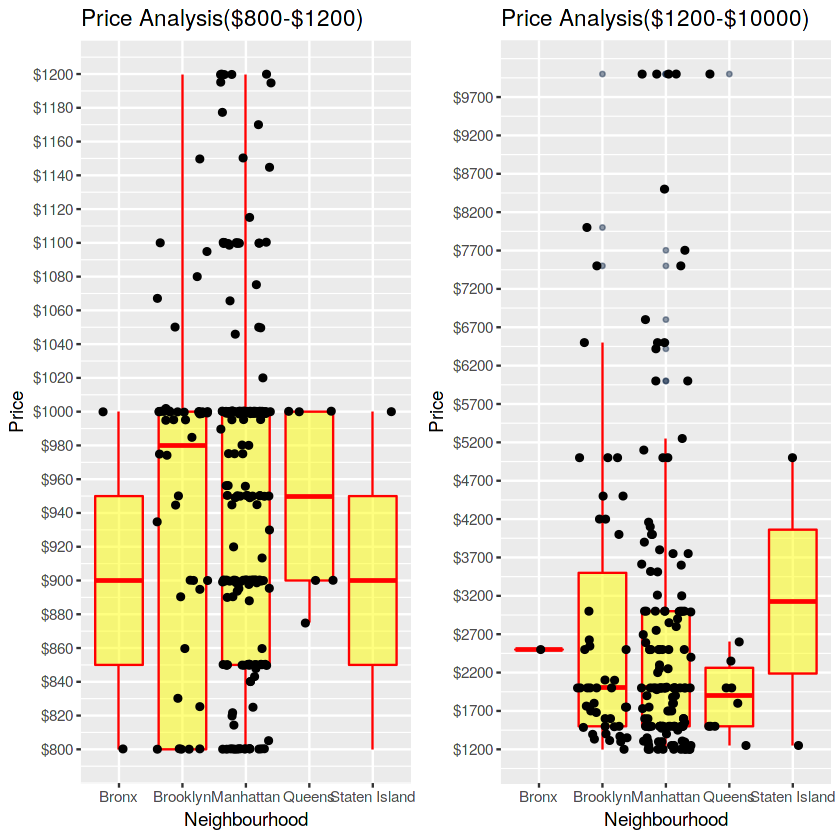

In [36]:
grid.arrange(list_plot[[3]], list_plot[[4]], nrow = 1)

#### 800 to 1200
* Manhattan and Brooklyn are having lots of properties rather than others in this price range.
* Property owners from neighbourhood other than Manhattan and Brooklyn don't want to take risk on higher price business. 
* It might be possible that they don't have properties which contain higher price potential.
 
#### 1200  to 10000
*  Near around 10 properties from Bronx, Queens, and Staten Island do have potential to stand with high price as per the data given.
*  But properties spread over Brookly and Manhattan just take over market by price and potential.

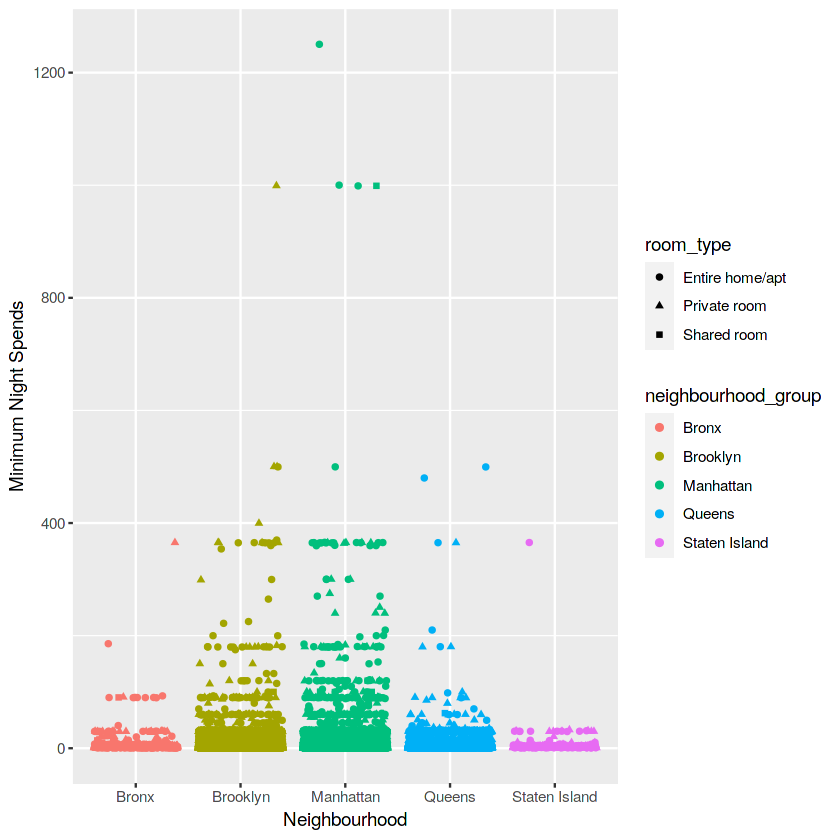

In [37]:
df%>%
   ggplot(aes(x=neighbourhood_group,y=minimum_nights))+
   geom_jitter(aes(colour = neighbourhood_group,shape = room_type ))+
   scale_x_discrete(name = "Neighbourhood") +
   scale_y_continuous(name = "Minimum Night Spends")

* As we can see in above graph that minimum night spends are greater than 5 to 6 days or incomparable.
* As per my secondaary research incomparable minimum nights are derived from lease agreements done by tentant and owner. 
* Max properties are highlighted by apt or private room with minimum night spends.
* Lots of properties are fully rented rather than visiting purpose rent at Manhattan followed by Brooklyn.

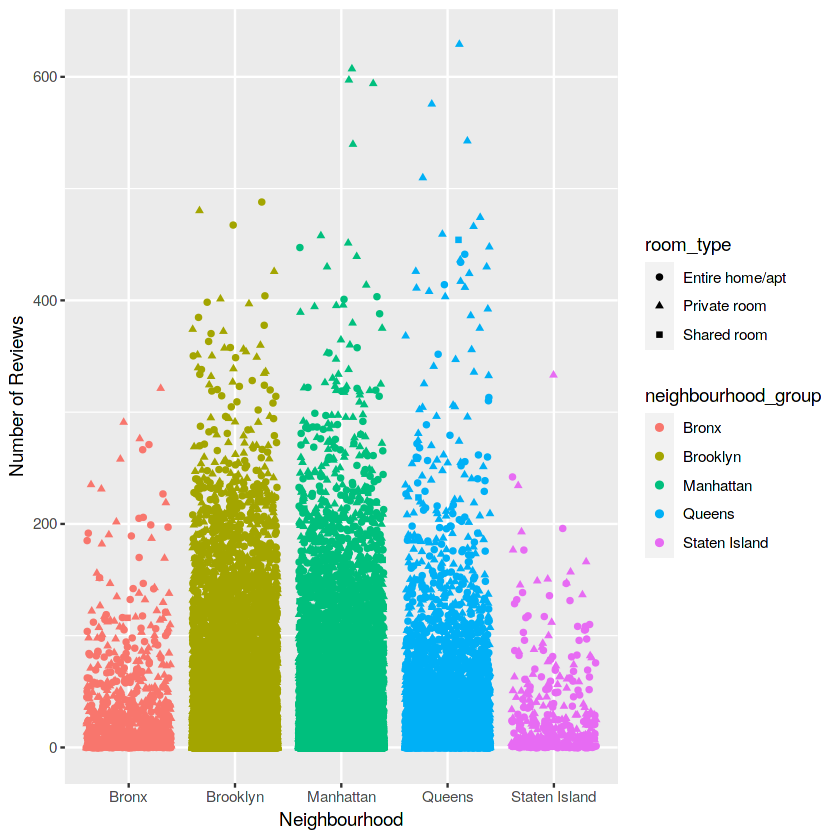

In [38]:
df%>%
   ggplot(aes(x=neighbourhood_group,y=number_of_reviews))+
   geom_jitter(aes(colour = neighbourhood_group,shape = room_type))+
   scale_x_discrete(name = "Neighbourhood") +
   scale_y_continuous(name = "Number of Reviews")

* Properties around Queens having such some unique things which build up a competation with top neighbourhoods in the context of number of reviews.
* Feedbacks from private room properties are higher than other properties.

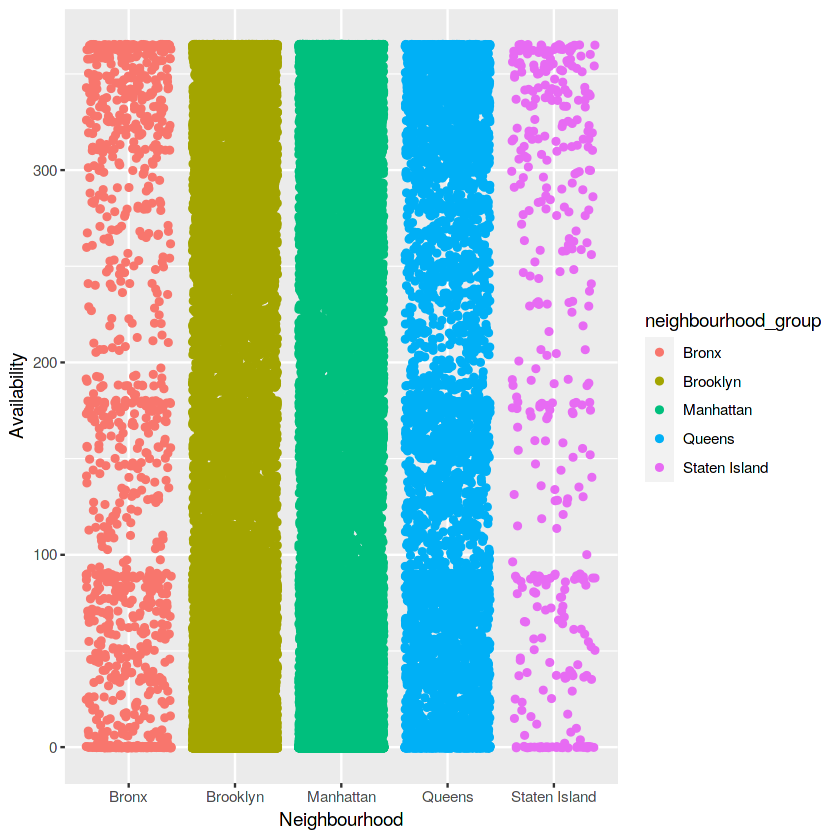

In [39]:
df%>%
   ggplot(aes(x=neighbourhood_group,y=availability_365))+
   geom_jitter(aes(colour = neighbourhood_group))+
   scale_x_discrete(name = "Neighbourhood") +
   scale_y_continuous(name = "Availability")

* Properties at the Bronx and Staten Island are busier than others. It may be due to fewer properties in that area.
* On the other hand, Airbnb should be strategies for better allocation of properties in the remaining neighborhood.

## Pricing Analysis w.r.t others

In [40]:
names(df)
str(df)

[1] "neighbourhood_group"            "latitude"                      
 [3] "longitude"                      "room_type"                     
 [5] "price"                          "minimum_nights"                
 [7] "number_of_reviews"              "reviews_per_month"             
 [9] "calculated_host_listings_count" "availability_365"              
[11] "host_name_id"                   "review_period"

'data.frame':	48895 obs. of  12 variables:
 $ neighbourhood_group           : Factor w/ 5 levels "Bronx","Brooklyn",..: 2 3 3 2 3 3 2 3 3 3 ...
 $ latitude                      : num  40.6 40.8 40.8 40.7 40.8 ...
 $ longitude                     : num  -74 -74 -73.9 -74 -73.9 ...
 $ room_type                     : chr  "Private room" "Entire home/apt" "Private room" "Entire home/apt" ...
 $ price                         : int  149 225 150 89 80 200 60 79 79 150 ...
 $ minimum_nights                : int  1 1 3 1 10 3 45 2 2 1 ...
 $ number_of_reviews             : int  9 45 0 270 9 74 49 430 118 160 ...
 $ reviews_per_month             : num  0.21 0.38 0 4.64 0.1 0.59 0.4 3.47 0.99 1.33 ...
 $ calculated_host_listings_count: int  6 2 1 1 1 1 1 1 1 4 ...
 $ availability_365              : int  365 355 365 194 0 129 0 220 0 188 ...
 $ host_name_id                  : chr  "John--2787" "Jennifer--2845" "Elisabeth--4632" "LisaRoxanne--4869" ...
 $ review_period                 : num  43 118

In [41]:
df_Cat_Variable <- select_if(df, (is.factor))
names(df_Cat_Variable)

[1] "neighbourhood_group"

* Null Hypoyhesis for (Price and Neighbourhood) : Neighbourhood group does not effect price.
* Null Hypoyhesis for (Price and Room type) : Room type does not effect price.

In [42]:
summary(aov(price~neighbourhood_group,data=df))
summary(aov(price~room_type,data=df))

                       Df    Sum Sq  Mean Sq F value Pr(>F)    
neighbourhood_group     4 7.959e+07 19897739     355 <2e-16 ***
Residuals           48890 2.740e+09    56051                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

               Df    Sum Sq  Mean Sq F value Pr(>F)    
room_type       2 1.850e+08 92512441    1717 <2e-16 ***
Residuals   48892 2.635e+09    53892                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

* In both cases null hypothesis rejected. Both variables have significant effects on Price.

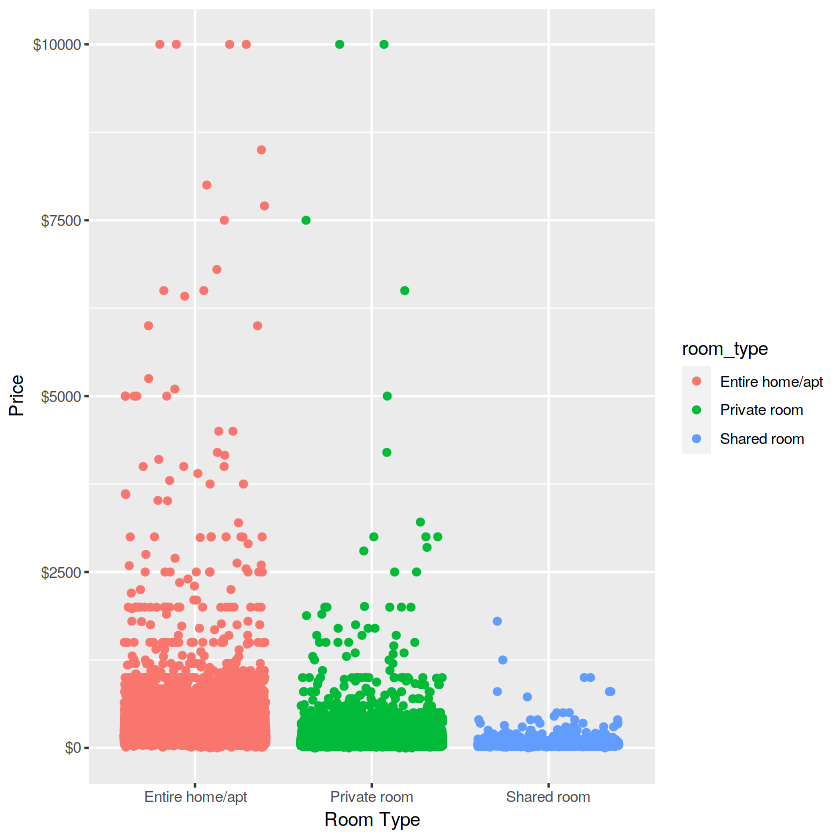

In [43]:
df%>%
   ggplot(aes(x=room_type,y=price))+
   geom_jitter(aes(colour = room_type))+
   scale_x_discrete(name = "Room Type") +
   scale_y_continuous(name = "Price",labels=function(x) paste0("$",x))

* Entire rooms are having high prices. But somehow Private rooms give good competition in some cases.

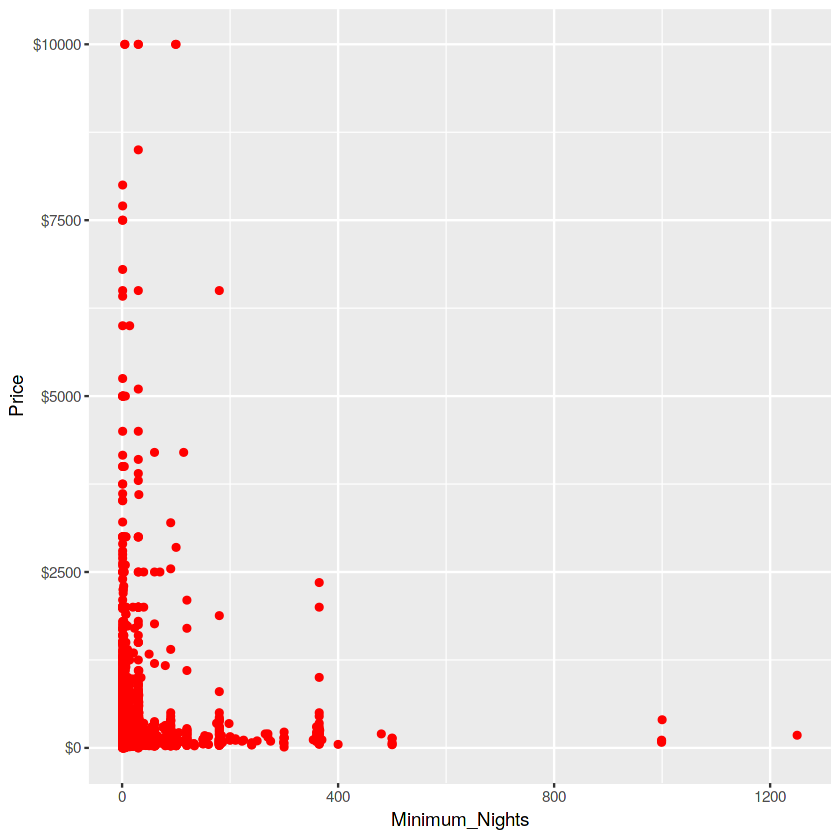

In [44]:
df%>%
   ggplot(aes(x=minimum_nights,y=price))+
   geom_point(colour="red")+
   scale_x_continuous(name = "Minimum_Nights") +
   scale_y_continuous(name = "Price",labels=function(x) paste0("$",x))

* Maximum nights are spend in between 200 days. Genuinely the maximum renting nights are not more than 30 days as per law. This data contain all chaos data which mixed up with rents and lease.Thats why this type of disturbance is framed in this visualization.

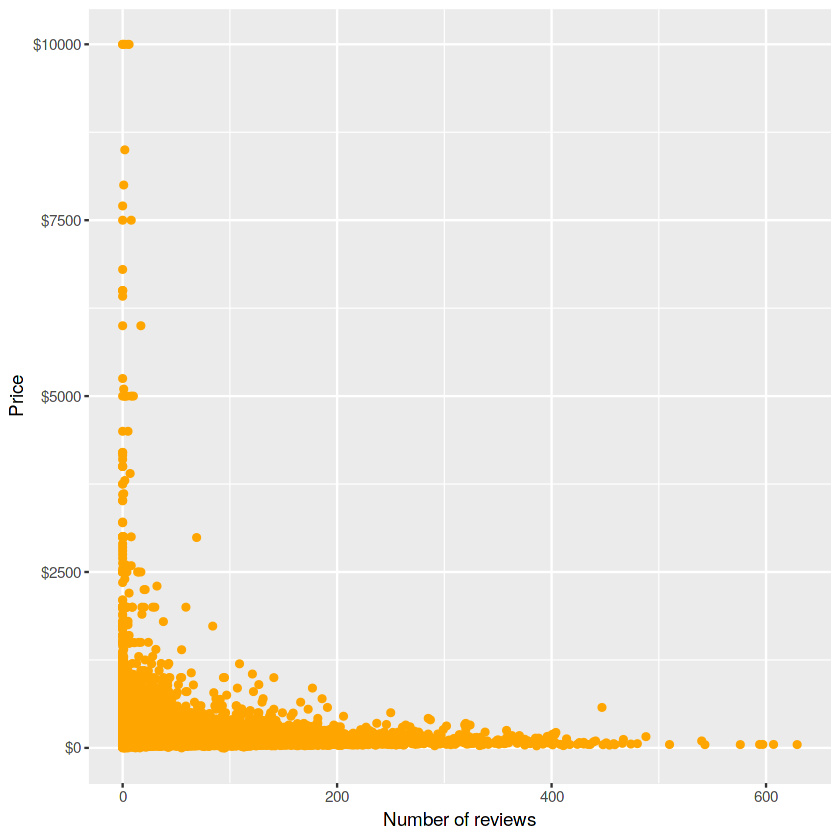

In [45]:
df%>%
   ggplot(aes(x=number_of_reviews,y=price))+
   geom_point(colour = "orange")+
   scale_x_continuous(name = "Number of reviews") +
   scale_y_continuous(name = "Price",labels=function(x) paste0("$",x))

* As per the visualization it is clear that number of reviews not effect price.

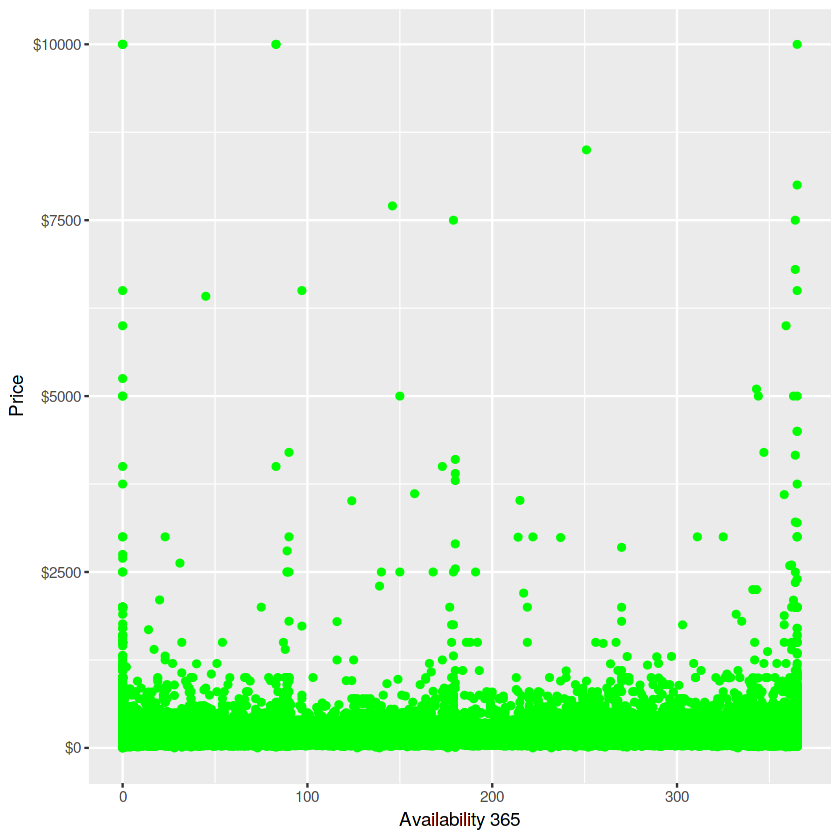

In [46]:
df%>%
   ggplot(aes(x=availability_365,y=price))+
   geom_point(colour = "green")+
   scale_x_continuous(name = "Availability 365") +
   scale_y_continuous(name = "Price",labels=function(x) paste0("$",x))

* Availability has mix-up effects on price.

### Why are you not doing regression analysis for following dataset?
   There are lots of features, missing in this dataset. Just go through open Airbnb datasets the data sets contains more than 100 variables, but here limitations are there. And I had done regression analysis and get less accuracy. That's why this dataset is useful for only EDA.